In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
df=pd.read_csv('matches (1).csv')
df['season']=df['season'].replace({'2007/08':'2008','2009/10':'2010','2020/21':'2021'})

In [117]:
df.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [118]:
df.isna().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

## Match Level Analysis

In [119]:
df.sample(5)


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
337,598012,2013,Chennai,2013-04-13,League,RA Jadeja,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,field,Chennai Super Kings,wickets,4.0,166.0,20.0,N,NaN,Asad Rauf,AK Chaudhary
89,392214,2009,Centurion,2009-05-07,League,ML Hayden,SuperSport Park,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,runs,12.0,187.0,18.0,N,D/L,DJ Harper,TH Wijewardene
1032,1422127,2024,Jaipur,2024-03-28,League,R Parag,"Sawai Mansingh Stadium, Jaipur",Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,Rajasthan Royals,runs,12.0,186.0,20.0,N,NaN,A Nand Kishore,Nitin Menon
130,419121,2010,Chennai,2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.0,20.0,Y,NaN,K Hariharan,DJ Harper
511,829813,2015,Bangalore,2015-05-17,League,NaN,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,NaN,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan


C:\Users\User\AppData\Local\Temp\ipykernel_8820\3162761807.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_match_count.index, y=season_match_count.values, palette="viridis")


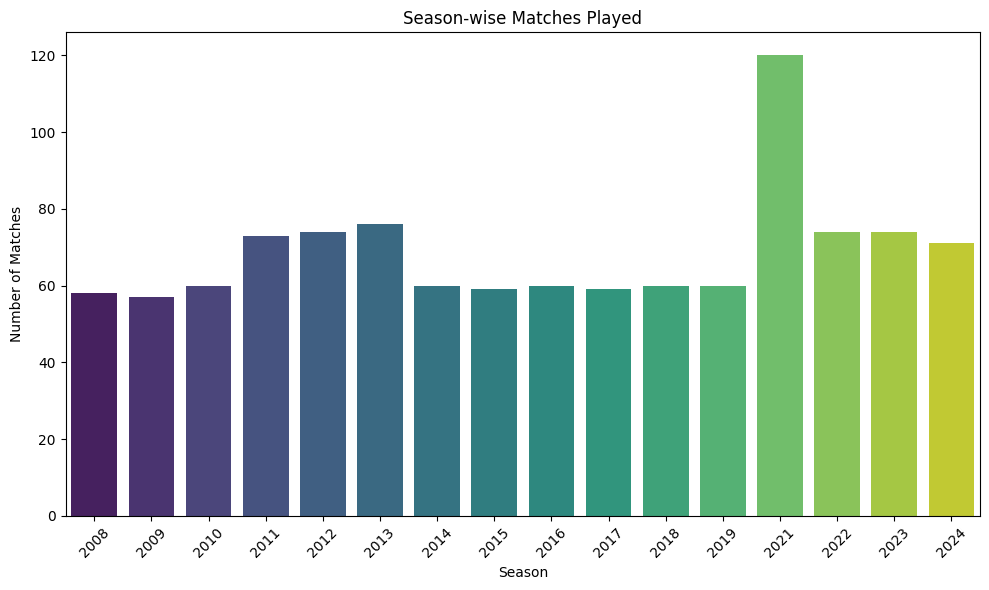

In [120]:
season_match_count = df['season'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=season_match_count.index, y=season_match_count.values, palette="viridis")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.title("Season-wise Matches Played")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8820\1100331876.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wins.values, y=team_wins.index, palette="crest")


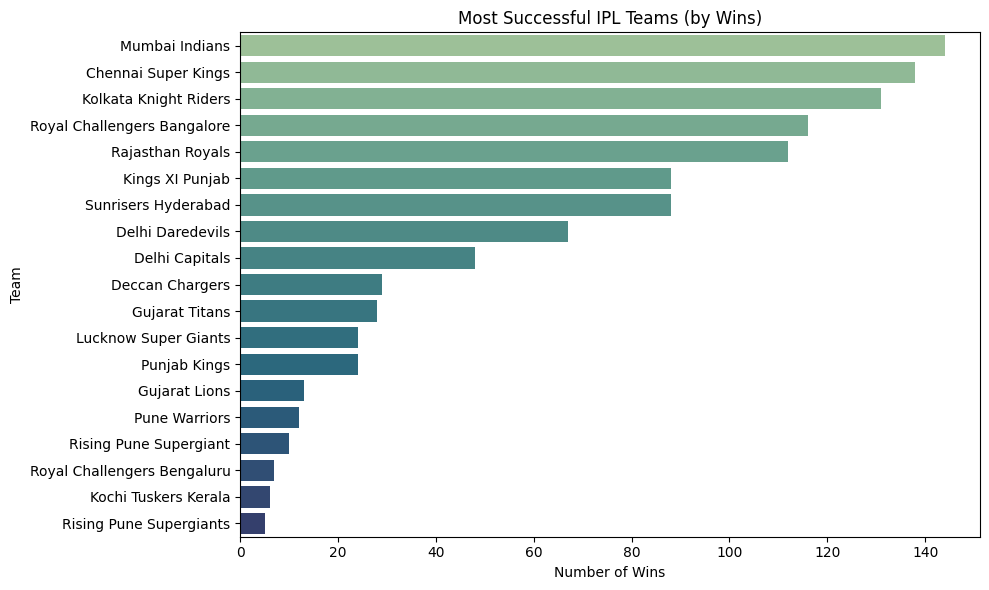

In [121]:
team_wins = df['winner'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=team_wins.values, y=team_wins.index, palette="crest")

plt.xlabel("Number of Wins")
plt.ylabel("Team")
plt.title("Most Successful IPL Teams (by Wins)")
plt.tight_layout()

plt.show()

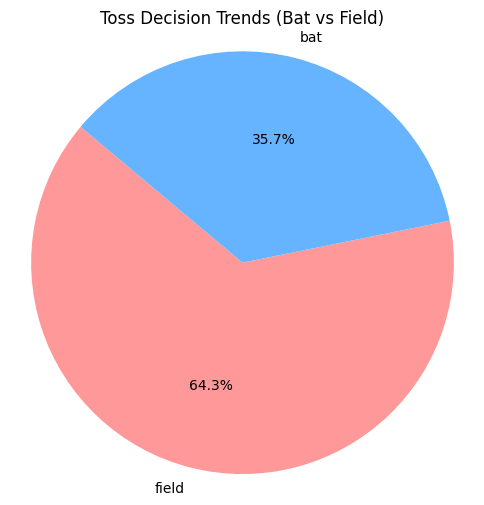

In [122]:
toss_decision_counts = df['toss_decision'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6,6))
plt.pie(toss_decision_counts, labels=toss_decision_counts.index, autopct='%1.1f%%', startangle=140, colors=["#ff9999", "#66b3ff"])
plt.title("Toss Decision Trends (Bat vs Field)")
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.show()

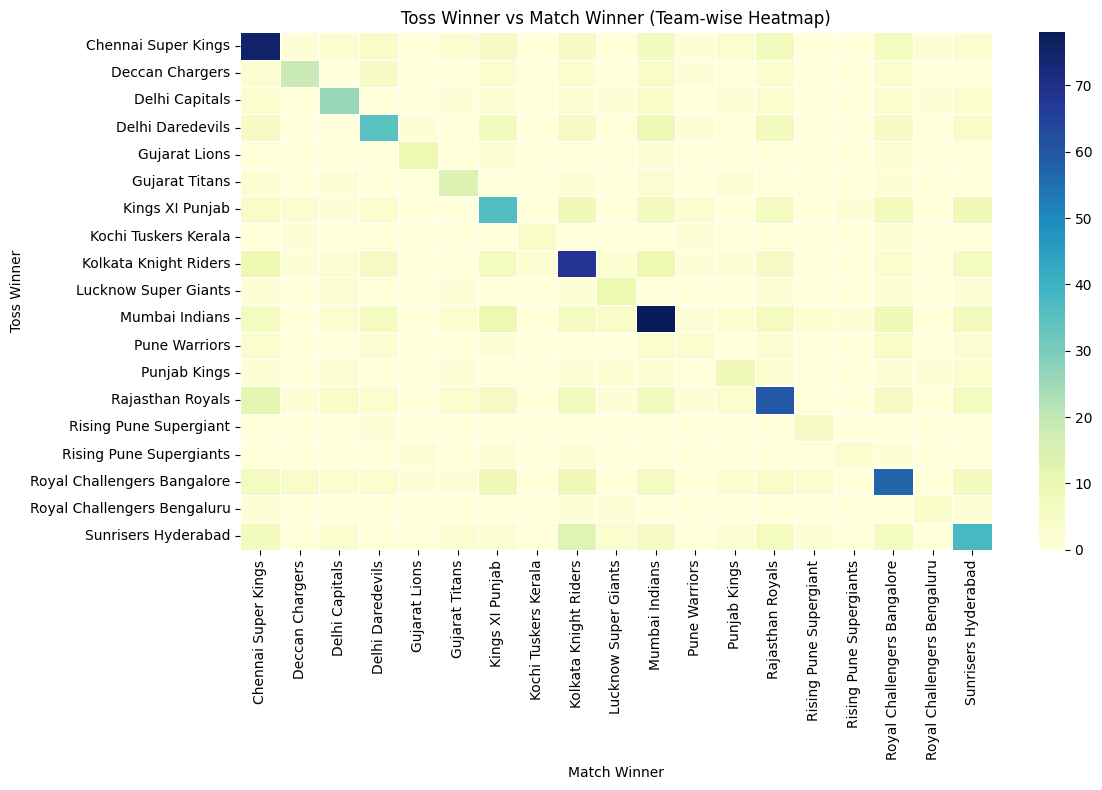

In [123]:
df['toss_match_winner'] = df['toss_winner'] == df['winner']
# Crosstab of toss winner and match winner
heat_data = pd.crosstab(df['toss_winner'], df['winner'])

counts = df['toss_match_winner'].value_counts()


# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(heat_data, cmap="YlGnBu", linewidths=0.5)
plt.title("Toss Winner vs Match Winner (Team-wise Heatmap)")
plt.xlabel("Match Winner")
plt.ylabel("Toss Winner")
plt.tight_layout()
plt.show()

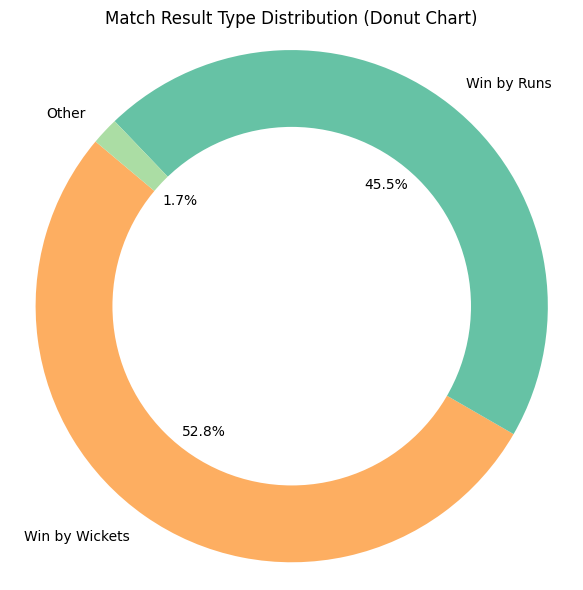

In [124]:
df['result_type'] = df['result'].apply(lambda x: 'Win by Runs' if x == 'runs' else ('Win by Wickets' if x == 'wickets' else 'Other'))
# Plot donut chart
result_counts = df['result_type'].value_counts()
plt.figure(figsize=(6,6))
wedges, texts, autotexts = plt.pie(result_counts, labels=result_counts.index, autopct='%1.1f%%',
                                   startangle=140, colors=["#fdae61", "#66c2a5", "#abdda4"])
# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Match Result Type Distribution (Donut Chart)")
plt.axis('equal')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8820\2198783724.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='victory_type', y='result_margin', data=df_victories, palette="Set2")


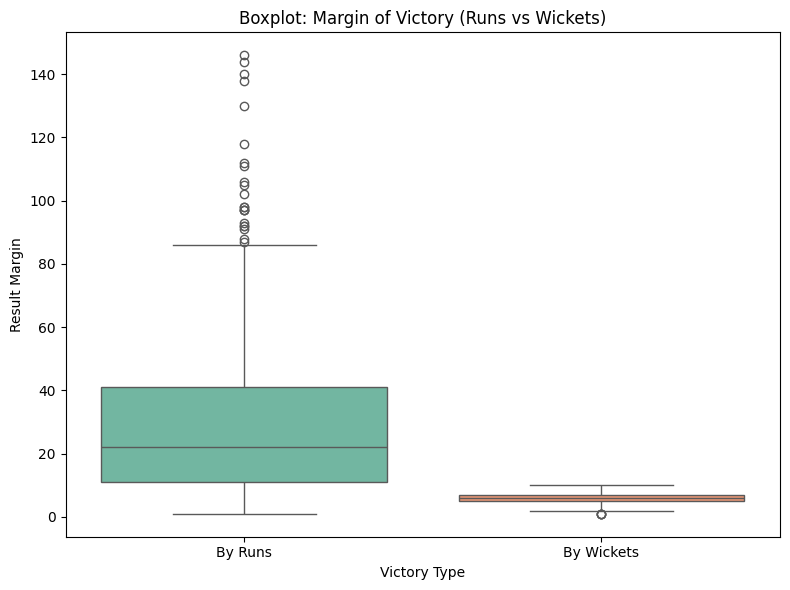

In [125]:
df_runs = df[df['result'] == 'runs']
df_wickets = df[df['result'] == 'wickets']
df['victory_type'] = df['result'].apply(lambda x: 'By Runs' if x == 'runs' else ('By Wickets' if x == 'wickets' else None))

# Filter out non-win rows
df_victories = df[df['victory_type'].notna()]

plt.figure(figsize=(8,6))
sns.boxplot(x='victory_type', y='result_margin', data=df_victories, palette="Set2")

plt.title("Boxplot: Margin of Victory (Runs vs Wickets)")
plt.xlabel("Victory Type")
plt.ylabel("Result Margin")
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8820\2641706927.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=super_over_counts.index, y=super_over_counts.values, palette='coolwarm')


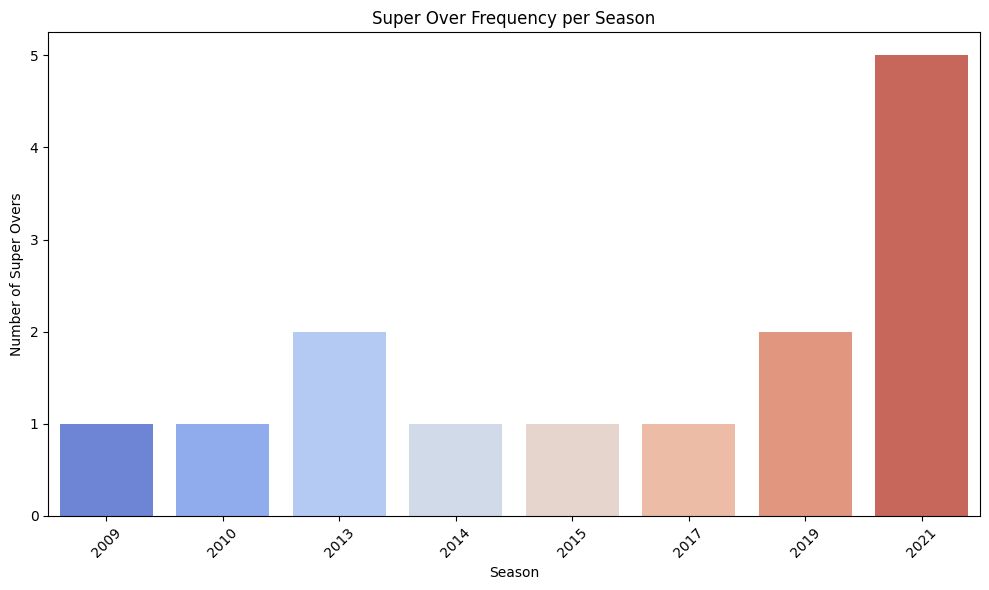

In [126]:
super_over_matches = df[(df['result'] == 'tie')]

# Count Super Over matches per season
super_over_counts = super_over_matches['season'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=super_over_counts.index, y=super_over_counts.values, palette='coolwarm')

plt.title("Super Over Frequency per Season")
plt.xlabel("Season")
plt.ylabel("Number of Super Overs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8820\3947020860.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dl_counts.index, y=dl_counts.values, palette="mako")


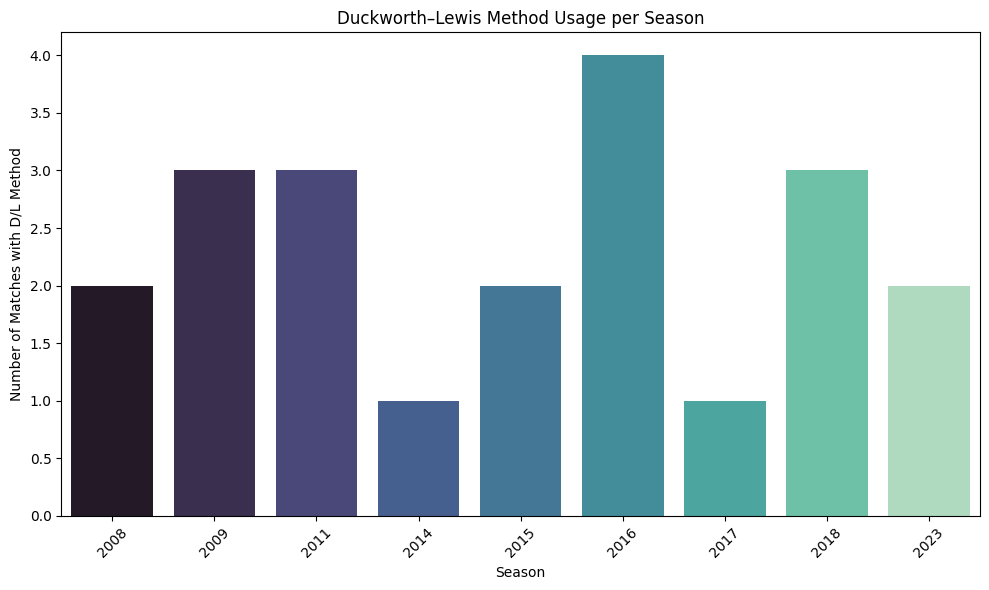

In [127]:
dl_matches = df[df['method'].notna()]

# Count D/L matches per season
dl_counts = dl_matches['season'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=dl_counts.index, y=dl_counts.values, palette="mako")

plt.title("Duckworth–Lewis Method Usage per Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches with D/L Method")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [128]:
deliveries=pd.read_csv('deliveries.csv')

C:\Users\User\AppData\Local\Temp\ipykernel_8820\2081939237.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette="rocket")


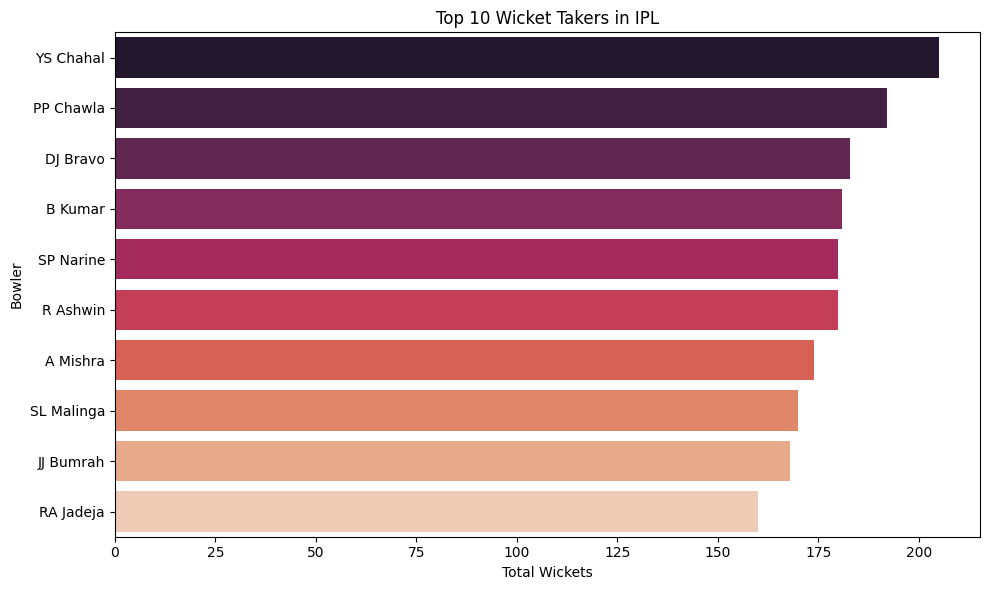

In [129]:
valid_dismissals = ['bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']

# Count wickets per bowler
wicket_data = deliveries[deliveries['dismissal_kind'].isin(valid_dismissals)]
top_bowlers = wicket_data['bowler'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette="rocket")

plt.title("Top 10 Wicket Takers in IPL")
plt.xlabel("Total Wickets")
plt.ylabel("Bowler")
plt.tight_layout()
plt.show()

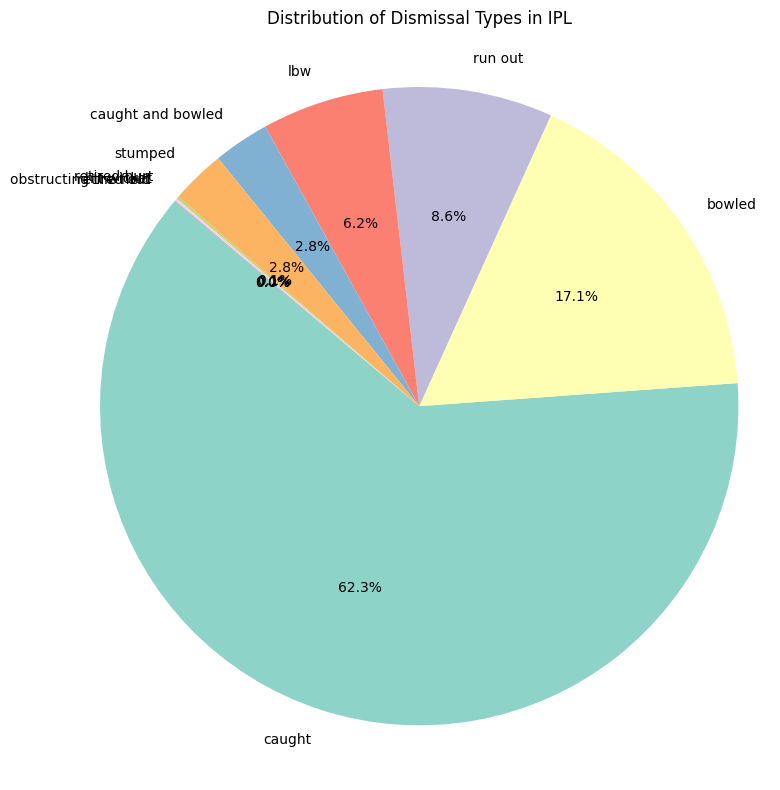

In [130]:
dismissals = deliveries['dismissal_kind'].dropna()

# Count of each dismissal type
dismissal_counts = dismissals.value_counts()

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(dismissal_counts, labels=dismissal_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title("Distribution of Dismissal Types in IPL")
plt.axis('equal')  # Makes the pie chart a circle
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8820\2098217138.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_strikers['strike_rate'], y=top_strikers.index, palette="viridis")


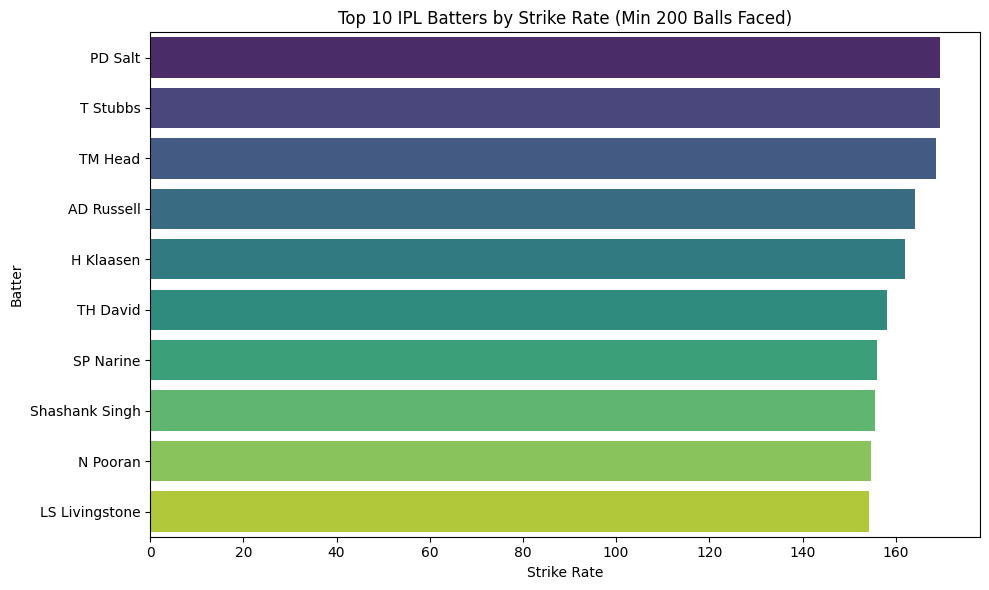

In [131]:
batter_stats = deliveries.groupby('batter').agg({
    'batter': 'count',            # This counts the number of balls faced
    'batsman_runs': 'sum'
}).rename(columns={'batter': 'balls_faced', 'batsman_runs': 'total_runs'})

batter_stats = batter_stats[batter_stats['balls_faced'] >= 200]

batter_stats['strike_rate'] = (batter_stats['total_runs'] / batter_stats['balls_faced']) * 100

top_strikers = batter_stats.sort_values(by='strike_rate', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_strikers['strike_rate'], y=top_strikers.index, palette="viridis")

plt.title("Top 10 IPL Batters by Strike Rate (Min 200 Balls Faced)")
plt.xlabel("Strike Rate")
plt.ylabel("Batter")
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8820\3319810648.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_economy['economy'], y=top_economy.index, palette="crest")


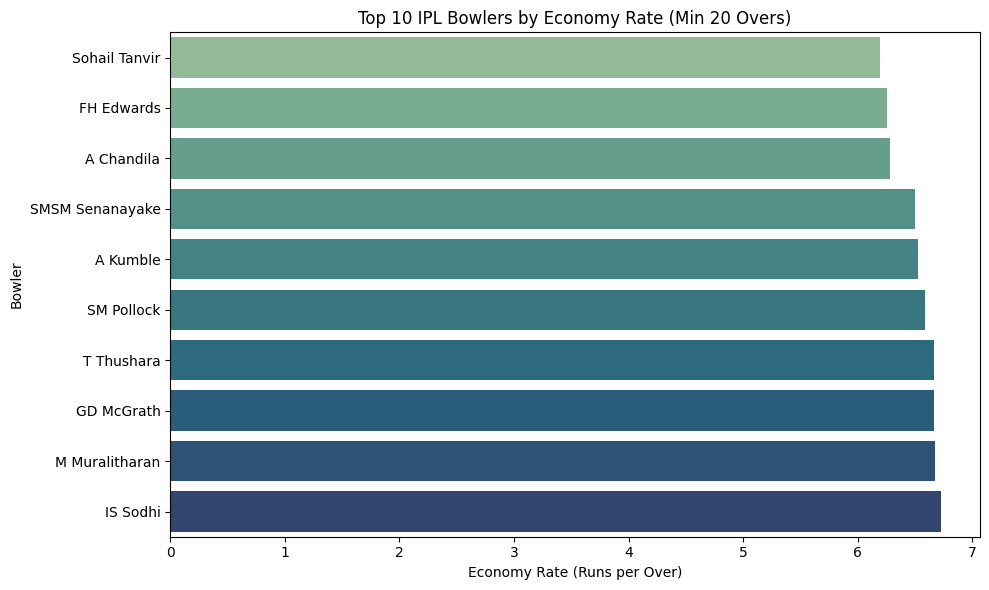

In [132]:
legal_deliveries = deliveries[deliveries['extras_type'].isin(['wides', 'noballs']) == False]

bowler_stats = legal_deliveries.groupby('bowler').agg(
    balls_bowled=('ball', 'count'),
    runs_conceded=('total_runs', 'sum')
)

bowler_stats = bowler_stats[bowler_stats['balls_bowled'] >= 120]

bowler_stats['economy'] = bowler_stats['runs_conceded'] / (bowler_stats['balls_bowled'] / 6)

top_economy = bowler_stats.sort_values(by='economy').head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_economy['economy'], y=top_economy.index, palette="crest")

plt.title("Top 10 IPL Bowlers by Economy Rate (Min 20 Overs)")
plt.xlabel("Economy Rate (Runs per Over)")
plt.ylabel("Bowler")
plt.tight_layout()
plt.show()

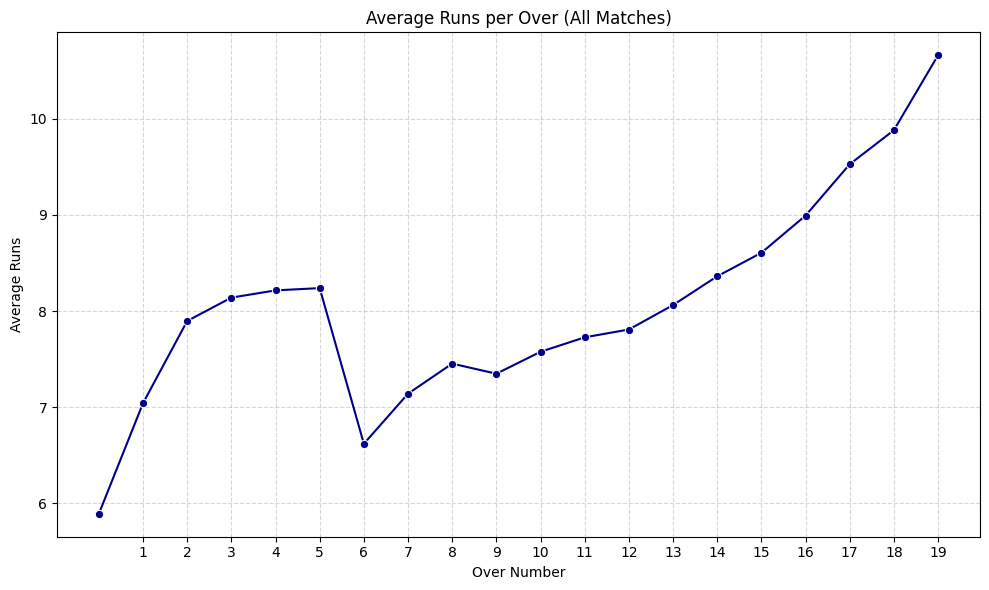

In [133]:
over_stats = deliveries.groupby('over').agg(
    total_runs=('total_runs', 'sum'),
    total_deliveries=('ball', 'count')
)

# Step 2: Calculate average runs per over (total runs / number of overs)
# Since each over has 6 deliveries, number of overs = total_deliveries / 6
over_stats['average_runs'] = over_stats['total_runs'] / (over_stats['total_deliveries'] / 6)

# Reset index to use 'over' for plotting
over_stats = over_stats.reset_index()

# Step 3: Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=over_stats, x='over', y='average_runs', marker='o', color='darkblue')

plt.title("Average Runs per Over (All Matches)")
plt.xlabel("Over Number")
plt.ylabel("Average Runs")
plt.xticks(range(1, max(over_stats['over']) + 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

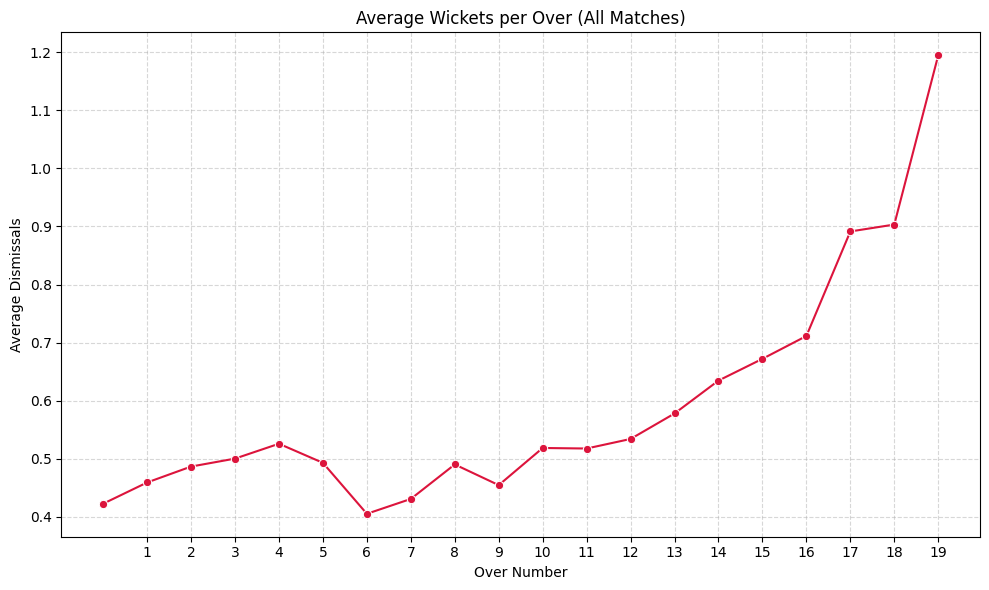

In [134]:
dismissals = deliveries[deliveries['dismissal_kind'].notna()]

# Step 2: Group by over and count dismissals
wickets_per_over = dismissals.groupby('over').size()

# Step 3: Count number of matches to get average
total_matches = deliveries['match_id'].nunique()
average_wickets = wickets_per_over / total_matches

# Reset index for plotting
average_wickets = average_wickets.reset_index()
average_wickets.columns = ['over', 'avg_wickets']

# Step 4: Plot (Line Chart)
plt.figure(figsize=(10,6))
sns.lineplot(data=average_wickets, x='over', y='avg_wickets', marker='o', color='crimson')

plt.title("Average Wickets per Over (All Matches)")
plt.xlabel("Over Number")
plt.ylabel("Average Dismissals")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(1, max(average_wickets['over']) + 1))
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8820\369439724.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_avg_powerplay.values, y=team_avg_powerplay.index, palette="coolwarm")


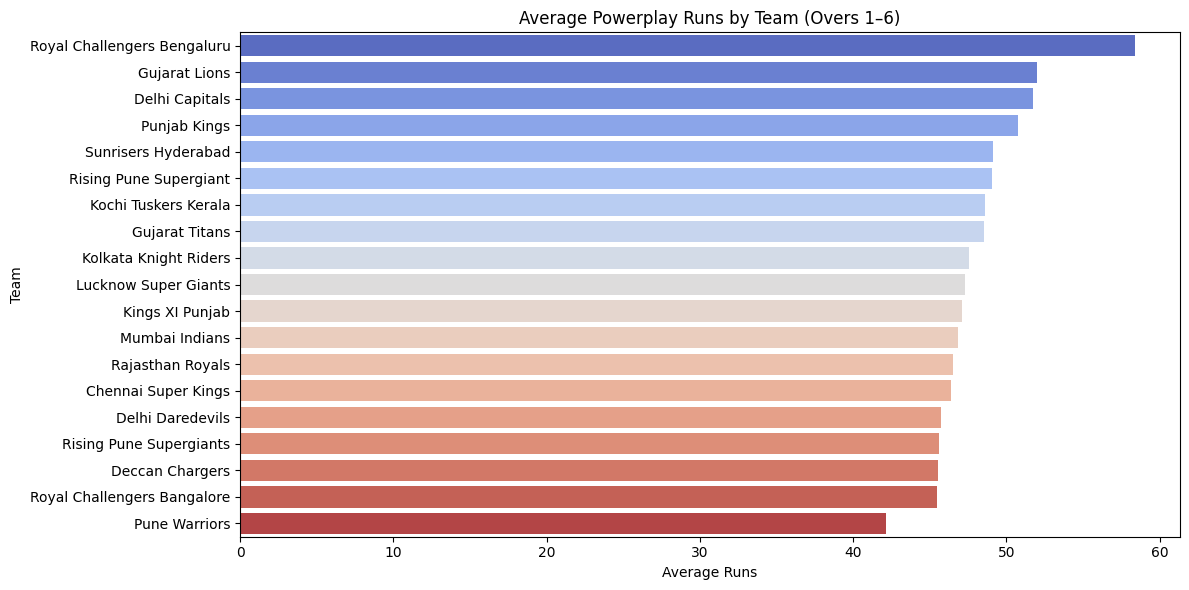

In [135]:
powerplay_df = deliveries[deliveries['over'] < 6]

# Step 2: Group by match and batting team to get Powerplay runs
powerplay_runs = powerplay_df.groupby(['match_id', 'batting_team'])['total_runs'].sum().reset_index()

# Step 3: Group by team to calculate average powerplay runs
team_avg_powerplay = powerplay_runs.groupby('batting_team')['total_runs'].mean().sort_values(ascending=False)

# Step 4: Plot - Bar Chart
plt.figure(figsize=(12,6))
sns.barplot(x=team_avg_powerplay.values, y=team_avg_powerplay.index, palette="coolwarm")

plt.title("Average Powerplay Runs by Team (Overs 1–6)")
plt.xlabel("Average Runs")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8820\2935025014.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=runs_scored.values, y=runs_scored.index, palette="YlOrBr")


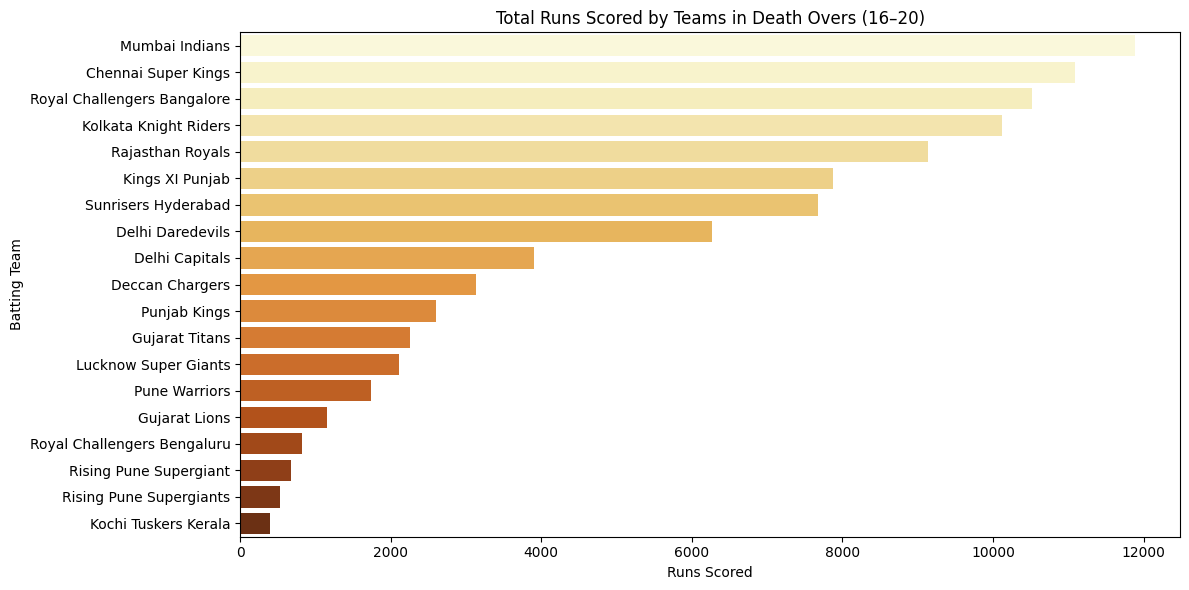

In [136]:
death_overs_df = deliveries[deliveries['over'] >= 15]
# Group by batting team and sum total runs
runs_scored = death_overs_df.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=runs_scored.values, y=runs_scored.index, palette="YlOrBr")

plt.title("Total Runs Scored by Teams in Death Overs (16–20)")
plt.xlabel("Runs Scored")
plt.ylabel("Batting Team")
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8820\4128219834.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=runs_conceded.values, y=runs_conceded.index, palette="Reds")


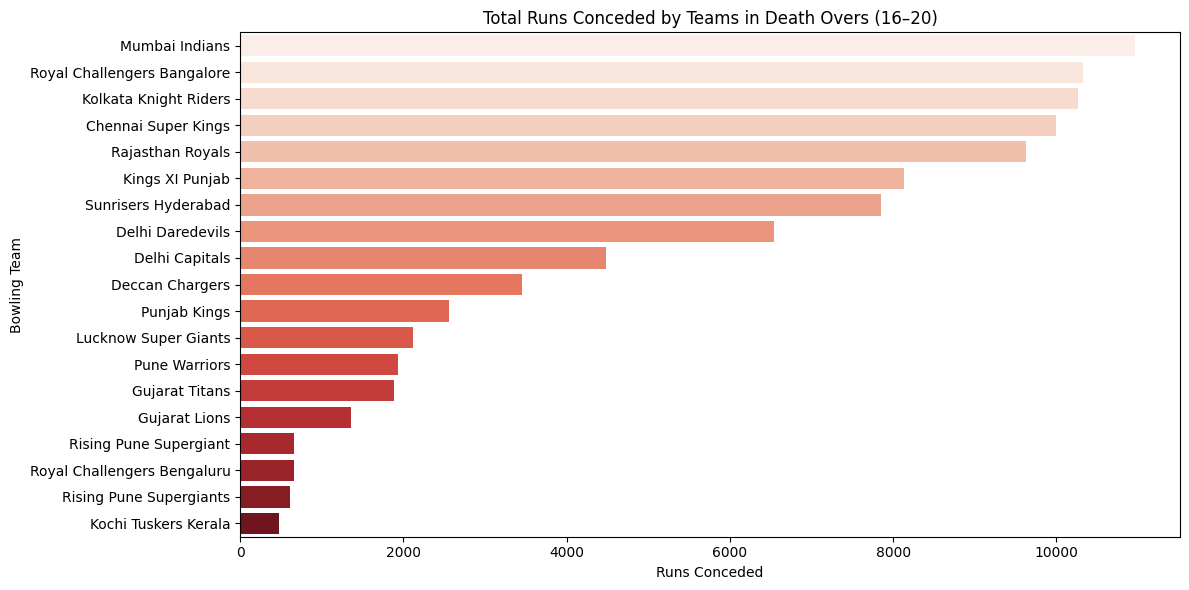

In [137]:
# Group by bowling team and sum total runs
runs_conceded = death_overs_df.groupby('bowling_team')['total_runs'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=runs_conceded.values, y=runs_conceded.index, palette="Reds")

plt.title("Total Runs Conceded by Teams in Death Overs (16–20)")
plt.xlabel("Runs Conceded")
plt.ylabel("Bowling Team")
plt.tight_layout()
plt.show()

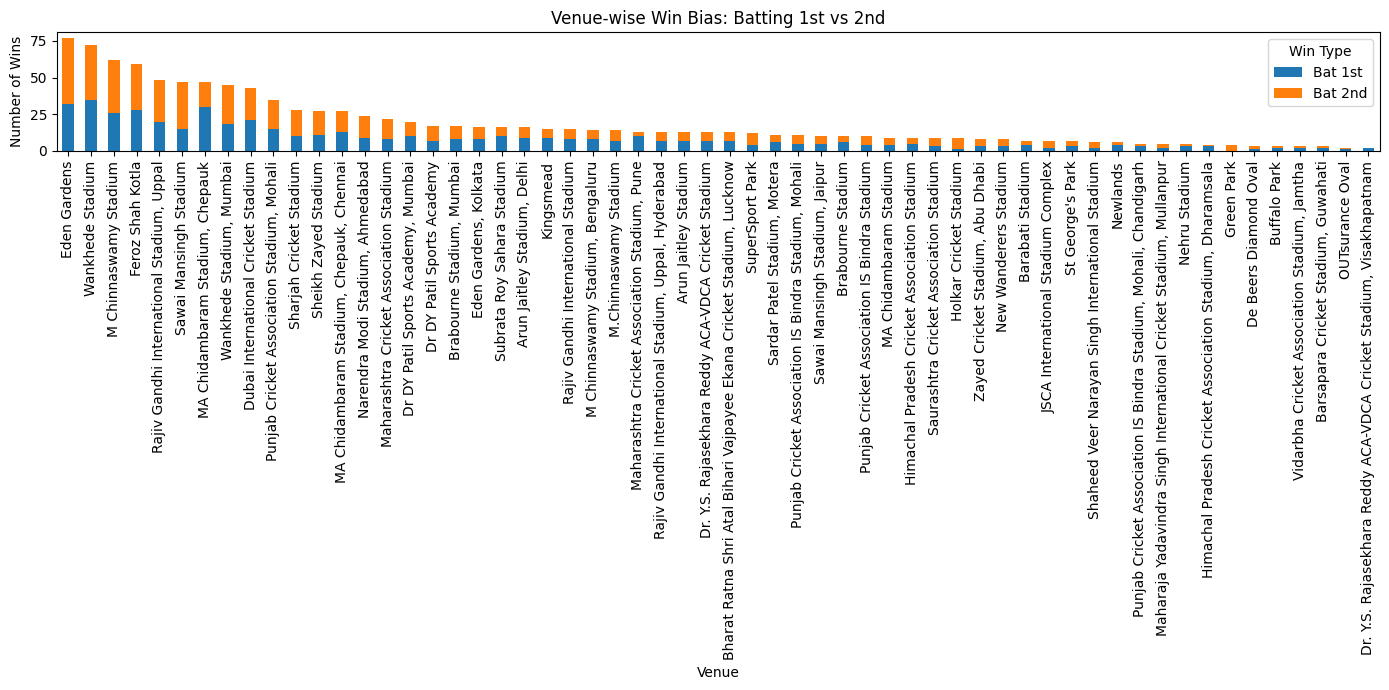

In [138]:
df = df[df['winner'].notna() & df['result'].isin(['runs', 'wickets'])]

# Create a column to identify whether the winner batted 1st or 2nd
df['win_type'] = df['result'].apply(lambda x: 'Bat 1st' if x == 'runs' else 'Bat 2nd')

# Group by venue and win type
venue_wins = df.groupby(['venue', 'win_type']).size().unstack(fill_value=0)

# Sort venues by total matches played
venue_wins['total'] = venue_wins.sum(axis=1)
venue_wins = venue_wins.sort_values(by='total', ascending=False).drop(columns='total')

# Plot
venue_wins.plot(kind='bar', stacked=True, figsize=(14,7), color=['#1f77b4', '#ff7f0e'])

plt.title("Venue-wise Win Bias: Batting 1st vs 2nd")
plt.xlabel("Venue")
plt.ylabel("Number of Wins")
plt.xticks(rotation=90)
plt.legend(title="Win Type")
plt.tight_layout()
plt.show()
